# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Valeriya Grant

## What does a Simple Linear Regression Model do?
#### A Simple Linear Regression model estimates changes of a dependent variable based on changes of one independent variable. 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('diamonds')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* Indicates relationship between independent and dependent variable
* Ranges from -1 to +1
* r-value of +1 indicates perfect positive correlation
* r-value of -1 indicates perfect negative correlation
* r-value of 0 indicates absence of linear relationship between variables

In [4]:
data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

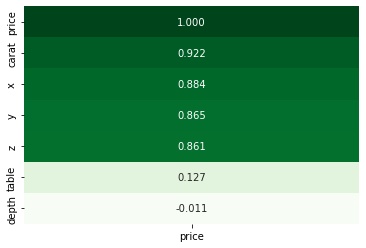

In [7]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split the dataset into a training dataset and a test dataset.
2. Use the training dataset to create a regression model.
3. Run the test dataset against the model to see if it is valid.
4. If the model is valid, use it to predict dependent variable based on independent variable.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']], 
    test_size=0.30, random_state=20)

In [10]:
model = LinearRegression()
model

LinearRegression()

In [11]:
model.fit(x_train, y_train)

LinearRegression()

In [12]:
model.score(x_test, y_test) 

0.8504107786474794

In [15]:
predict_y = model.predict(x_test)
predict_y

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [16]:
prediction = pd.DataFrame(predict_y, columns=['predicted_price'])
prediction.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [31]:
joined = prediction.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
joined.head()

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [34]:
melted = pd.melt(joined, id_vars=['carat'], 
                 value_vars=['price','predicted_price'], 
                 var_name='price_type', value_name='price_value')

melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


<AxesSubplot:xlabel='carat', ylabel='price_value'>

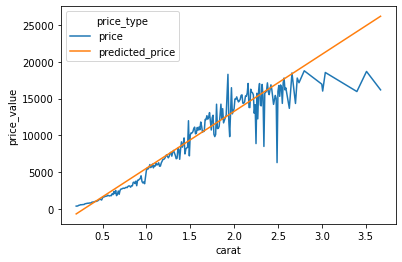

In [39]:
sns.lineplot(data=melted, x='carat', y='price_value', ci=None, hue='price_type')

## 
* b is the **Y-intercept**

In [113]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [114]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [115]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800453984


In [116]:
print(f"Regression line equation is y = {m}X + {b}")

Regression line equation is y = [7756.42561797]X + -2256.3605800453984


In [128]:
X = 0.70
y = float(m*X+b)
print(f"The predicted price for a {X:.2f} carat diamond is ${y:,.2f}")

The predicted price for a 0.70 carat diamond is $3,173.14


In [131]:
X = 0.54
y = float(m*X+b)
print(f"The predicted price for a {X:.2f} carat diamond is ${y:,.2f}")

The predicted price for a 0.54 carat diamond is $1,932.11


##### **The estimates in the previous two cells apper to be pretty close to the predicted prices in the results of step 18:**
* for 0.70 carat diamond estimated price is \\$3,173.14 and predicted price is \\$3180.984246
* for 0.54 carat diamond estimated price is \\$1,932.11 and predicted price is \\$1940.075433